In [1]:
#scikit-learn

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from skimage.io import imread
import cv2
from skimage.transform import resize
from sklearn.model_selection import StratifiedKFold

#from keras.preprocessing.image import ImageDataGenerator
#import keras
#import keras.backend as K

In [2]:
df=pd.read_csv('./Data/train.csv', index_col=0)
df.head()

Target
Id                                           
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [3]:
df.index

Index(['00070df0-bbc3-11e8-b2bc-ac1f6b6435d0',
       '000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0',
       '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0',
       '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0',
       '001838f8-bbca-11e8-b2bc-ac1f6b6435d0',
       '001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0',
       '0020af02-bbba-11e8-b2ba-ac1f6b6435d0',
       '002679c2-bbb6-11e8-b2ba-ac1f6b6435d0',
       '00285ce4-bba0-11e8-b2b9-ac1f6b6435d0',
       '002daad6-bbc9-11e8-b2bc-ac1f6b6435d0',
       ...
       'ffe454e6-bb99-11e8-b2b9-ac1f6b6435d0',
       'ffe55eba-bbba-11e8-b2ba-ac1f6b6435d0',
       'ffe61798-bbc3-11e8-b2bc-ac1f6b6435d0',
       'ffe8cf0c-bba9-11e8-b2ba-ac1f6b6435d0',
       'ffeae6f0-bbc9-11e8-b2bc-ac1f6b6435d0',
       'ffed4430-bbac-11e8-b2ba-ac1f6b6435d0',
       'fff0a998-bbae-11e8-b2ba-ac1f6b6435d0',
       'fff189d8-bbab-11e8-b2ba-ac1f6b6435d0',
       'fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0',
       'fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0'],
      dtype='object', name='Id', length=31072)

In [4]:
images=[imread('./Data/train/'+x+'_green.png', as_gray=True) for x in df.index]
print(images[0].shape)
df['Image']=images

(512, 512)


In [66]:
#thresholded=df.iloc[:20, 1].apply(lambda x: cv2.thr)

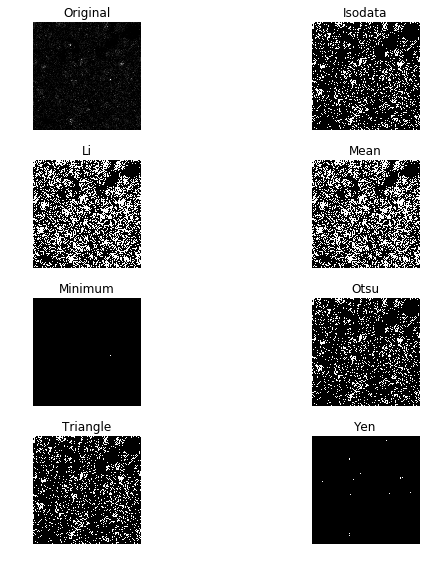

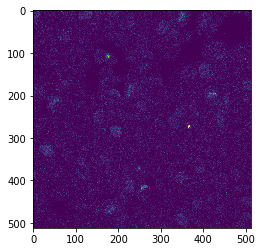

In [6]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(df.iloc[0, 1], figsize=(10, 8), verbose=False)
plt.show()
plt.imshow(df.iloc[0, 1])
plt.show()

Example Images


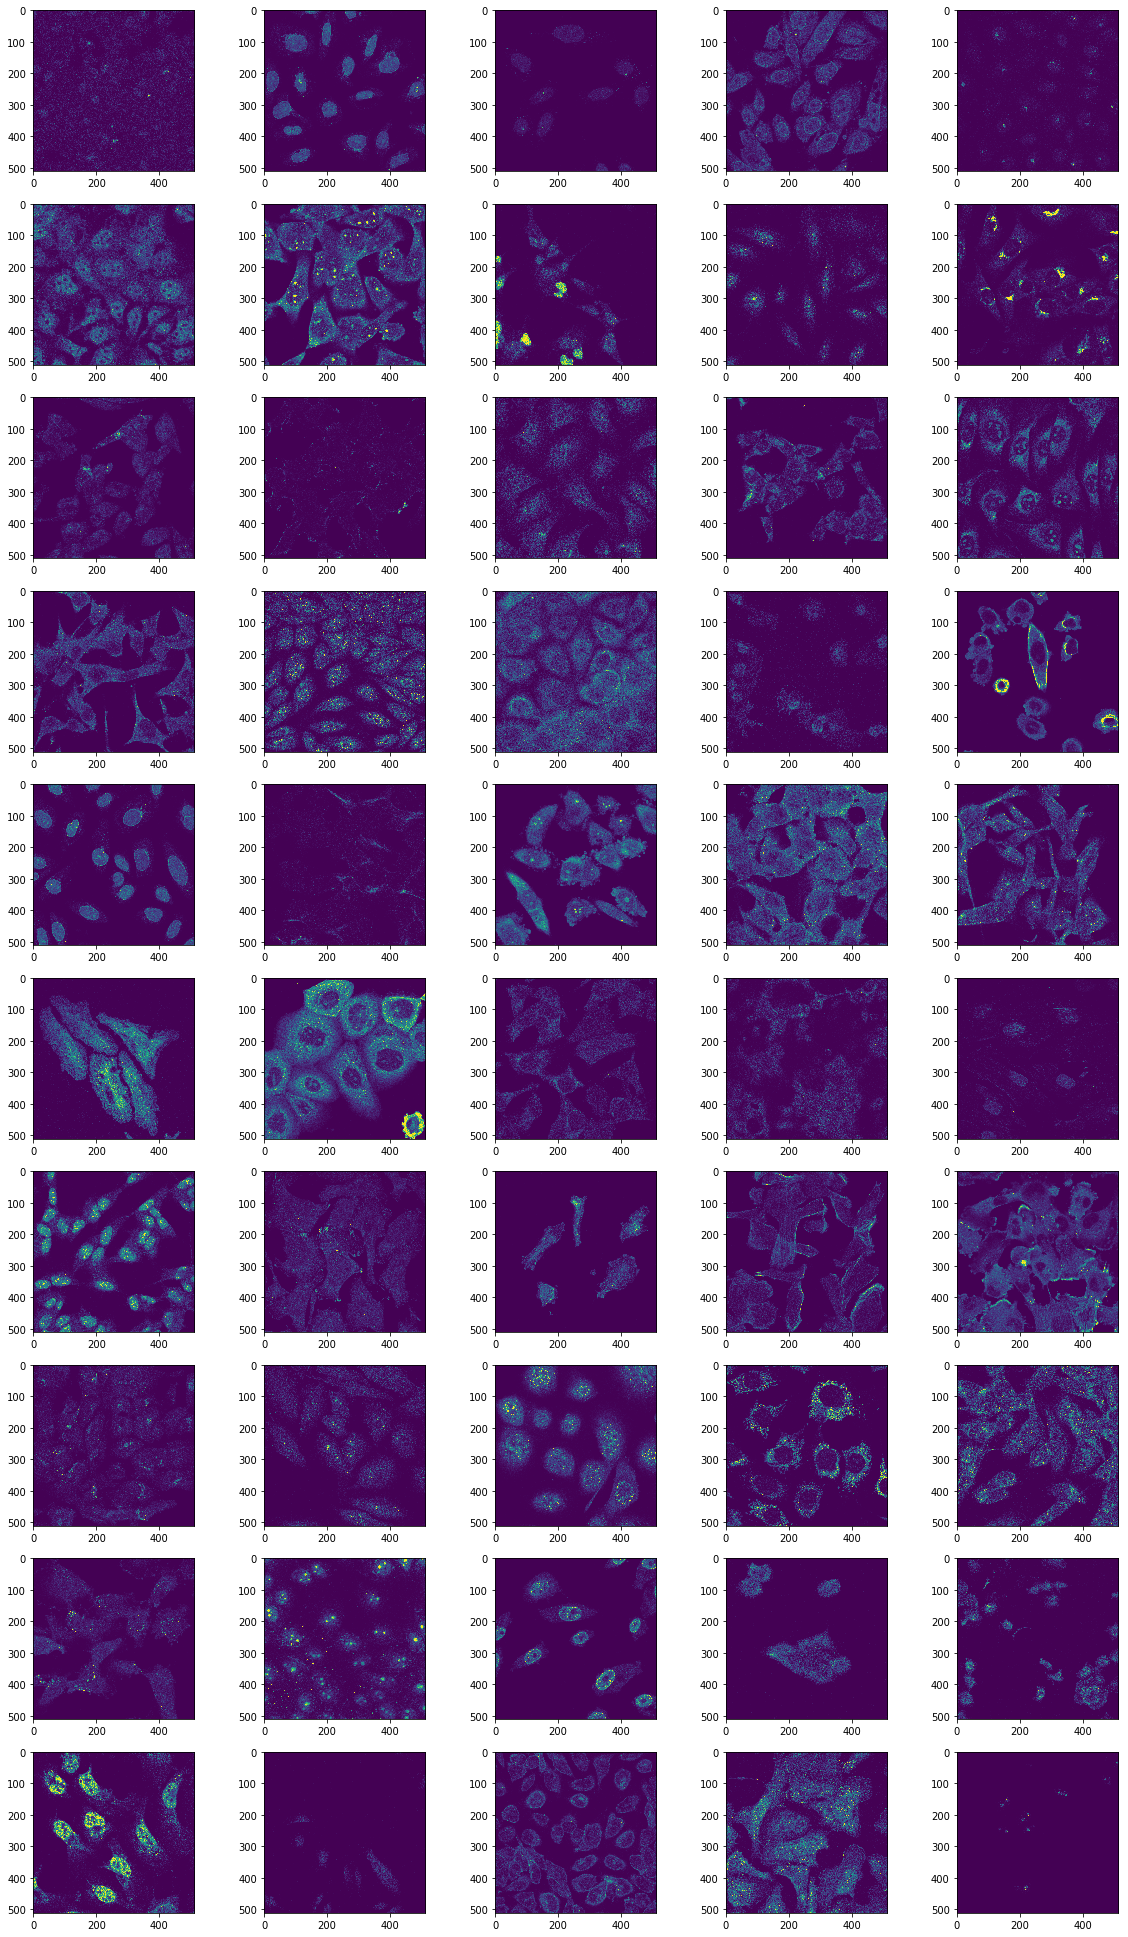

In [7]:
shape=[10, 5]
fig=plt.figure(figsize=(20, 35))
for i in range(shape[0]*shape[1]):
    sub=plt.subplot(shape[0], shape[1], i+1)
    plt.imshow(df.iloc[i, 1])
print('Example Images')
plt.show()

In [8]:
df['Hist']=df['Image'].apply(lambda x: np.histogram(x, 128)[0])
df.head()

Target  \
Id                                              
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0   
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5   
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18   

                                                                                  Image  \
Id                                                                                        
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0  [[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,...   
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [[1, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,...   
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                                                   Hist  
Id                                                                                       
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0  [109322, 23251, 20210, 17353, 15039, 12604, 10...  
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [176534, 16493, 9999, 6657, 4649, 3324, 2312, ...  
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0  [231419, 4799, 3146, 2962, 3087, 2945, 2800, 2...  
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0  [107377, 11906, 8641, 7448, 7305, 7379, 7356, ...  
001838f8-bbca-11e8-b2bc-ac1f6b6435d0  [174819, 33119, 18475, 11102, 7161, 4571, 3142...

Example Images


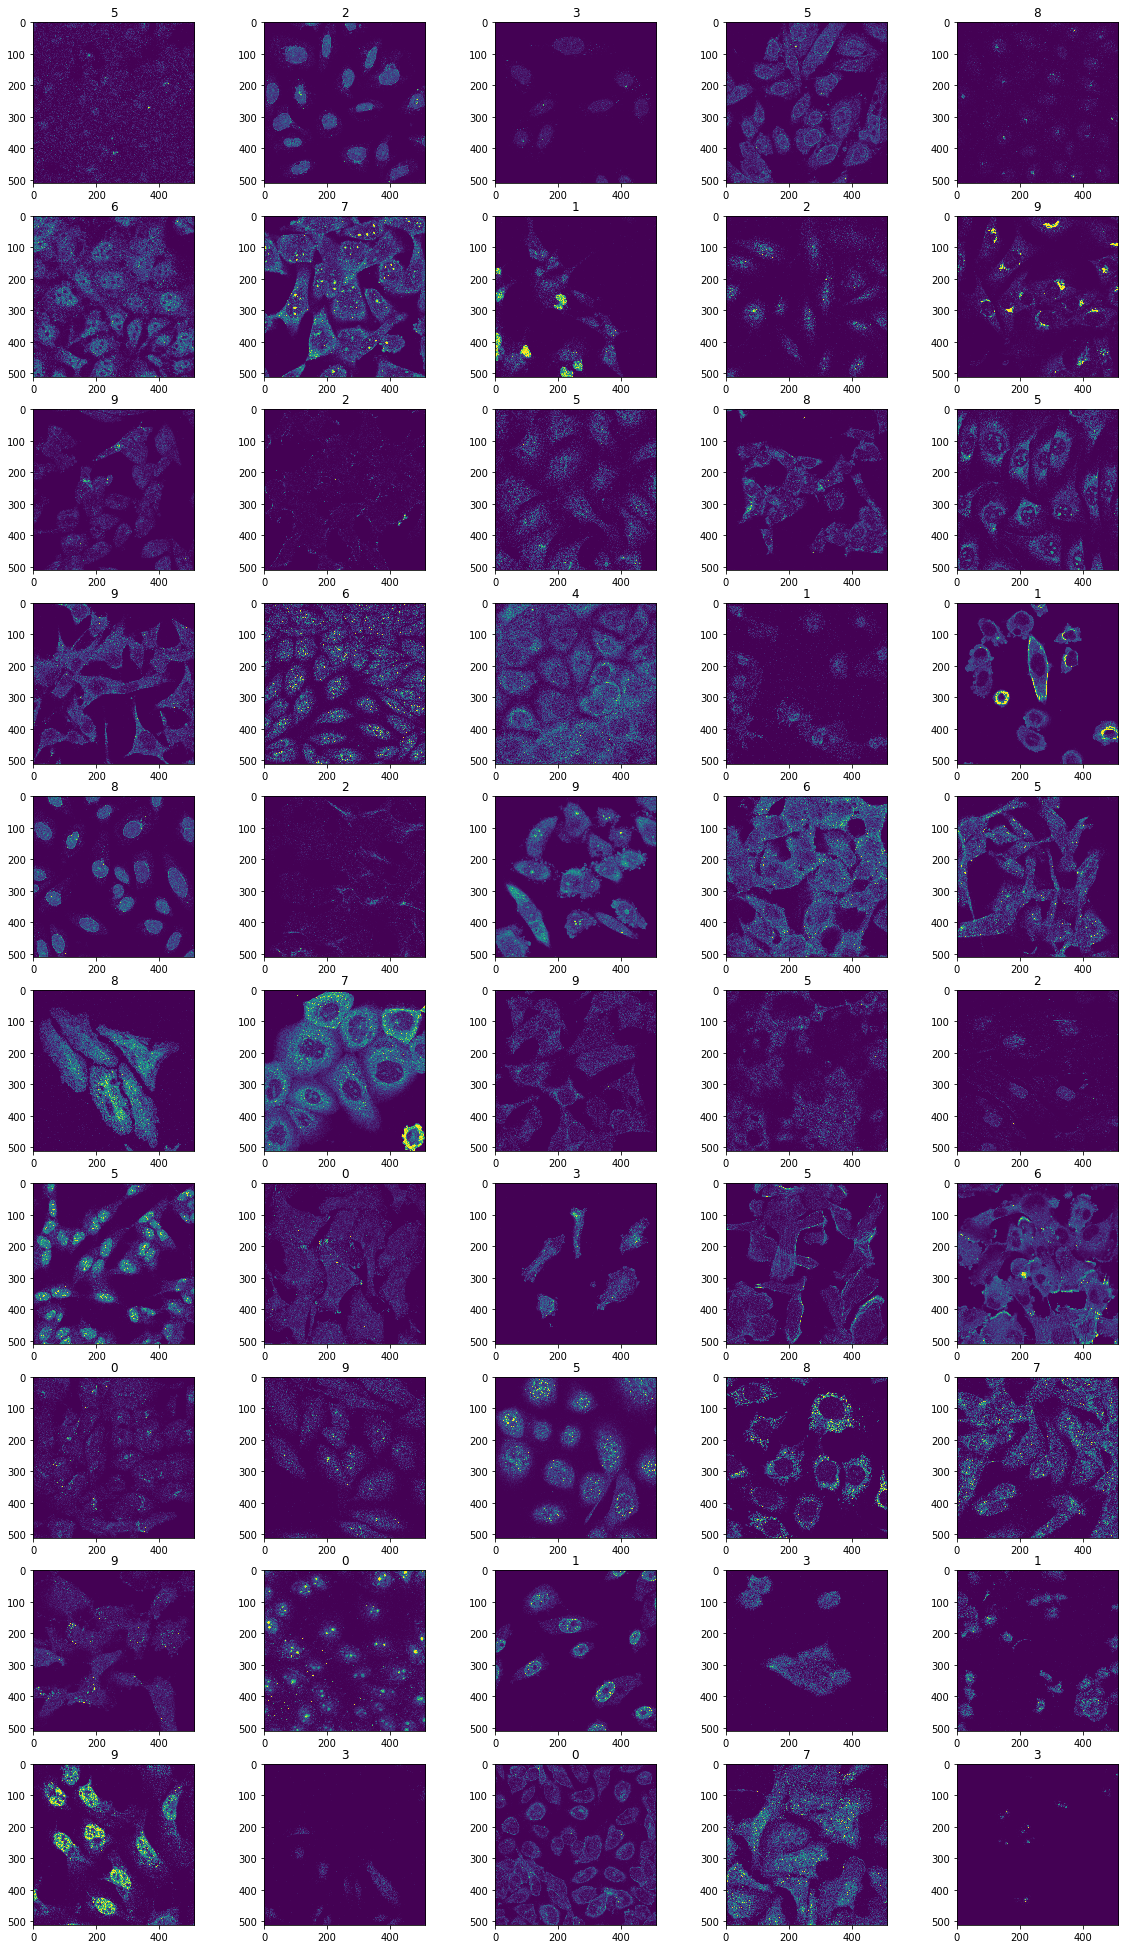

In [9]:
from sklearn.cluster import KMeans
clusters=10
kmeans=KMeans(clusters)
df['Cluster']=kmeans.fit_predict([np.array(x) for x in df['Hist'].values])
df.head()
shape=[10, 5]
fig=plt.figure(figsize=(20, 35))
for i in range(shape[0]*shape[1]):
    sub=plt.subplot(shape[0], shape[1], i+1)
    sub.set_title(df.iloc[i, 3])
    plt.imshow(df.iloc[i, 1])
print('Example Images')
plt.show()

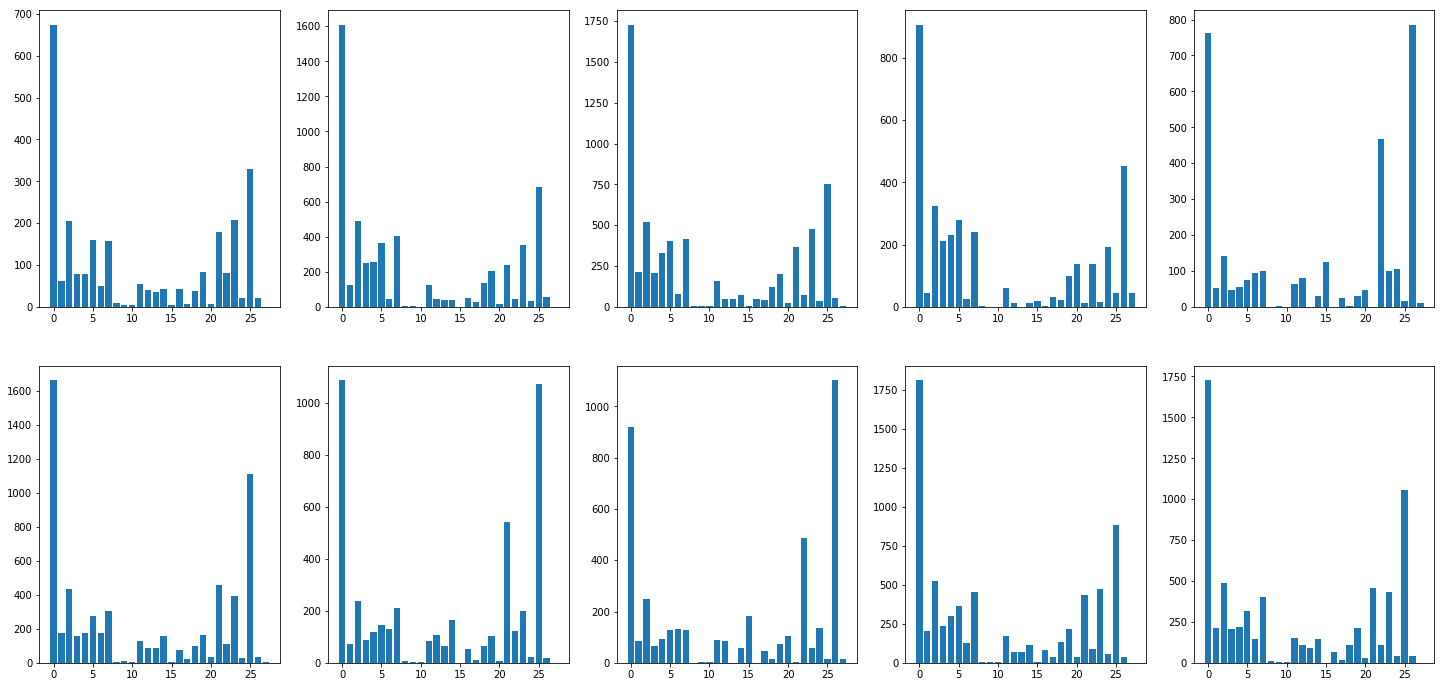

In [10]:
plt.figure(figsize=(25, 12))
df['Classes']=df['Target'].apply(lambda x: np.array([int(t) for t in x.split(' ')]))
for i in range(clusters):
    cluster=df.loc[df['Cluster']==i]
    classes=cluster['Classes']
    al=[]
    for k in classes:
        al.extend(list(k))
    al=np.array(al)
    hist=np.histogram(al, 28)
    sub=plt.subplot(2, 5, i+1)
    plt.bar(range(28), hist[0])
plt.show()

In [20]:
df

Target  \
Id                                              
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0   
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5   
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18   
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0        0   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0     25 2   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0        0   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0      2 0   
002daad6-bbc9-11e8-b2bc-ac1f6b6435d0        7   
002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0       23   
00301238-bbb2-11e8-b2ba-ac1f6b6435d0       21   
0032a07e-bba9-11e8-b2ba-ac1f6b6435d0     24 0   
00344514-bbc2-11e8-b2bb-ac1f6b6435d0       23   
00357b1e-bba9-11e8-b2ba-ac1f6b6435d0      6 2   
00383b44-bbbb-11e8-b2ba-ac1f6b6435d0       25   
0038d6a6-bb9a-11e8-b2b9-ac1f6b6435d0     25 0   
003957a8-bbb7-11e8-b2ba-ac1f6b6435d0       25   
003feb6e-bbca-11e8-b2bc-ac1f6b6435d0        0   
0042017c-bba4-11e8-b2b9-ac1f6b6435d0    25 11   
00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
0047c984-bba6-11e8-b2ba-ac1f6b6435d0       11   
00481c70-bba3-11e8-b2b9-ac1f6b6435d0     25 2   
004a2b84-bbc4-11e8-b2bc-ac1f6b6435d0     25 0   
004b47de-bbca-11e8-b2bc-ac1f6b6435d0     25 3   
004bf4c6-bbc6-11e8-b2bc-ac1f6b6435d0     16 6   
004d8a0e-bbc4-11e8-b2bc-ac1f6b6435d0     25 2   
004efaa2-bba5-11e8-b2ba-ac1f6b6435d0       23   
004f7c66-bb9b-11e8-b2b9-ac1f6b6435d0       25   
004f8abc-bbb9-11e8-b2ba-ac1f6b6435d0     12 0   
...                                       ...   
ffb00d58-bba3-11e8-b2b9-ac1f6b6435d0  25 18 0   
ffb49f82-bbab-11e8-b2ba-ac1f6b6435d0   25 2 0   
ffb5effa-bbaf-11e8-b2ba-ac1f6b6435d0        0   
ffb610c6-bbb8-11e8-b2ba-ac1f6b6435d0     11 0   
ffb6fb76-bba9-11e8-b2ba-ac1f6b6435d0        0   
ffb74ef0-bbae-11e8-b2ba-ac1f6b6435d0      7 0   
ffbebc4e-bb9a-11e8-b2b9-ac1f6b6435d0        4   
ffc30612-bbbf-11e8-b2bb-ac1f6b6435d0      3 0   
ffc8820a-bbc8-11e8-b2bc-ac1f6b6435d0     25 7   
ffcebbc8-bbc5-11e8-b2bc-ac1f6b6435d0   19 2 0   
ffced1a2-bbad-11e8-b2ba-ac1f6b6435d0     25 7   
ffcf84d6-bbac-11e8-b2ba-ac1f6b6435d0        0   
ffd23be4-bba3-11e8-b2b9-ac1f6b6435d0        5   
ffd298f4-bbc7-11e8-b2bc-ac1f6b6435d0     25 0   
ffd2b880-bba8-11e8-b2ba-ac1f6b6435d0   25 3 0   
ffd45d0c-bbad-11e8-b2ba-ac1f6b6435d0       25   
ffd96262-bbc0-11e8-b2bb-ac1f6b6435d0        4   
ffdb9014-bba2-11e8-b2b9-ac1f6b6435d0        0   
ffdbe064-bbbb-11e8-b2ba-ac1f6b6435d0       23   
ffdcc5e4-bbaa-11e8-b2ba-ac1f6b6435d0        0   
ffe454e6-bb99-11e8-b2b9-ac1f6b6435d0    16 14   
ffe55eba-bbba-11e8-b2ba-ac1f6b6435d0      5 0   
ffe61798-bbc3-11e8-b2bc-ac1f6b6435d0    19 23   
ffe8cf0c-bba9-11e8-b2ba-ac1f6b6435d0       18   
ffeae6f0-bbc9-11e8-b2bc-ac1f6b6435d0     25 0   
ffed4430-bbac-11e8-b2ba-ac1f6b6435d0       21   
fff0a998-bbae-11e8-b2ba-ac1f6b6435d0        5   
fff189d8-bbab-11e8-b2ba-ac1f6b6435d0        7   
fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0  25 2 21   
fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0      2 0   

                                                                                  Image  \
Id                                                                                        
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0  [[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,...   
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [[1, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,...   
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0  [[36, 22, 14, 49, 36, 60, 56, 28, 28, 33, 17, ...   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0  [[0

In [32]:
df

Target  \
Id                                              
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0   
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5   
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18   
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0        0   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0     25 2   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0        0   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0      2 0   
002daad6-bbc9-11e8-b2bc-ac1f6b6435d0        7   
002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0       23   
00301238-bbb2-11e8-b2ba-ac1f6b6435d0       21   
0032a07e-bba9-11e8-b2ba-ac1f6b6435d0     24 0   
00344514-bbc2-11e8-b2bb-ac1f6b6435d0       23   
00357b1e-bba9-11e8-b2ba-ac1f6b6435d0      6 2   
00383b44-bbbb-11e8-b2ba-ac1f6b6435d0       25   
0038d6a6-bb9a-11e8-b2b9-ac1f6b6435d0     25 0   
003957a8-bbb7-11e8-b2ba-ac1f6b6435d0       25   
003feb6e-bbca-11e8-b2bc-ac1f6b6435d0        0   
0042017c-bba4-11e8-b2b9-ac1f6b6435d0    25 11   
00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
0047c984-bba6-11e8-b2ba-ac1f6b6435d0       11   
00481c70-bba3-11e8-b2b9-ac1f6b6435d0     25 2   
004a2b84-bbc4-11e8-b2bc-ac1f6b6435d0     25 0   
004b47de-bbca-11e8-b2bc-ac1f6b6435d0     25 3   
004bf4c6-bbc6-11e8-b2bc-ac1f6b6435d0     16 6   
004d8a0e-bbc4-11e8-b2bc-ac1f6b6435d0     25 2   
004efaa2-bba5-11e8-b2ba-ac1f6b6435d0       23   
004f7c66-bb9b-11e8-b2b9-ac1f6b6435d0       25   
004f8abc-bbb9-11e8-b2ba-ac1f6b6435d0     12 0   
...                                       ...   
ffb00d58-bba3-11e8-b2b9-ac1f6b6435d0  25 18 0   
ffb49f82-bbab-11e8-b2ba-ac1f6b6435d0   25 2 0   
ffb5effa-bbaf-11e8-b2ba-ac1f6b6435d0        0   
ffb610c6-bbb8-11e8-b2ba-ac1f6b6435d0     11 0   
ffb6fb76-bba9-11e8-b2ba-ac1f6b6435d0        0   
ffb74ef0-bbae-11e8-b2ba-ac1f6b6435d0      7 0   
ffbebc4e-bb9a-11e8-b2b9-ac1f6b6435d0        4   
ffc30612-bbbf-11e8-b2bb-ac1f6b6435d0      3 0   
ffc8820a-bbc8-11e8-b2bc-ac1f6b6435d0     25 7   
ffcebbc8-bbc5-11e8-b2bc-ac1f6b6435d0   19 2 0   
ffced1a2-bbad-11e8-b2ba-ac1f6b6435d0     25 7   
ffcf84d6-bbac-11e8-b2ba-ac1f6b6435d0        0   
ffd23be4-bba3-11e8-b2b9-ac1f6b6435d0        5   
ffd298f4-bbc7-11e8-b2bc-ac1f6b6435d0     25 0   
ffd2b880-bba8-11e8-b2ba-ac1f6b6435d0   25 3 0   
ffd45d0c-bbad-11e8-b2ba-ac1f6b6435d0       25   
ffd96262-bbc0-11e8-b2bb-ac1f6b6435d0        4   
ffdb9014-bba2-11e8-b2b9-ac1f6b6435d0        0   
ffdbe064-bbbb-11e8-b2ba-ac1f6b6435d0       23   
ffdcc5e4-bbaa-11e8-b2ba-ac1f6b6435d0        0   
ffe454e6-bb99-11e8-b2b9-ac1f6b6435d0    16 14   
ffe55eba-bbba-11e8-b2ba-ac1f6b6435d0      5 0   
ffe61798-bbc3-11e8-b2bc-ac1f6b6435d0    19 23   
ffe8cf0c-bba9-11e8-b2ba-ac1f6b6435d0       18   
ffeae6f0-bbc9-11e8-b2bc-ac1f6b6435d0     25 0   
ffed4430-bbac-11e8-b2ba-ac1f6b6435d0       21   
fff0a998-bbae-11e8-b2ba-ac1f6b6435d0        5   
fff189d8-bbab-11e8-b2ba-ac1f6b6435d0        7   
fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0  25 2 21   
fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0      2 0   

                                                                                  Image  \
Id                                                                                        
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0  [[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,...   
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [[1, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,...   
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0  [[36, 22, 14, 49, 36, 60, 56, 28, 28, 33, 17, ...   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0  [[0

In [29]:
#other method

In [21]:
#image visualisation 
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image


In [28]:
#load data
train_df = pd.read_csv('./Data/train.csv')
train_df.head()

Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [30]:
#creation of classes
channels = ['_yellow', '_red', '_green', '_blue']

index_class_dict = {
    0: "Nucleoplasm",
    1: "Nuclear membrane",
    2: "Nucleoli",
    3: "Nucleoli fibrillar center",
    4: "Nuclear speckles",
    5: "Nuclear bodies",
    6: "Endoplasmic reticulum",
    7: "Golgi apparatus",
    8: "Peroxisomes",
    9: "Endosomes",
    10: "Lysosomes",
    11: "Intermediate filaments",
    12: "Actin filaments",
    13: "Focal adhesion sites",
    14: "Microtubules",
    15: "Microtubule ends",
    16: "Cytokinetic bridge",
    17: "Mitotic spindle",
    18: "Microtubule organizing center",
    19: "Centrosome",
    20: "Lipid droplets",
    21: "Plasma membrane",
    22: "Cell junctions",
    23: "Mitochondria",
    24: "Aggresome",
    25: "Cytosol",
    26: "Cytoplasmic bodies",
    27: "Rods & rings"
}

In [31]:
#Create cols for each class

train_df[f'target_vec'] = train_df['Target'].map(lambda x: list(map(int, x.strip().split())))
for i in range(28):
    train_df[f'{index_class_dict[i]}'] = train_df['Target'].map(
             lambda x: 1 if str(i) in x.strip().split() else 0)
train_df.head()

Id   Target    target_vec  Nucleoplasm  \
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0       [16, 0]            1   
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0  [7, 1, 2, 0]            1   
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5           [5]            0   
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1           [1]            0   
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18          [18]            0   

   Nuclear membrane  Nucleoli  Nucleoli fibrillar center  Nuclear speckles  \
0                 0         0                          0                 0   
1                 1         1                          0                 0   
2                 0         0                          0                 0   
3                 1         0                          0                 0   
4                 0         0                          0                 0   

   Nuclear bodies  Endoplasmic reticulum      ...       \
0               0                      0      ...        
1               0                      0      ...        
2               1                      0      ...        
3               0                      0      ...        
4               0                      0      ...        

   Microtubule organizing center  Centrosome  Lipid droplets  Plasma membrane  \
0                              0           0               0                0   
1                              0           0               0                0   
2                              0           0               0                0   
3                              0           0               0                0   
4                              1           0               0                0   

   Cell junctions  Mitochondria  Aggresome  Cytosol  Cytoplasmic bodies  \
0               0             0          0        0                   0   
1               0             0          0        0                   0   
2               0             0          0        0                   0   
3               0             0          0        0                   0   
4               0             0          0        0                   0   

   Rods & rings  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 31 columns]

In [33]:
#Get part of data with specific class
class_index = 1  # Nuclear membrane
current_part = train_df[train_df[index_class_dict[class_index]] == 1]
print(f'shape before {train_df.shape}, shape after {current_part.shape}')
current_part.head()


shape before (31072, 31), shape after (1254, 31)


Id   Target    target_vec  Nucleoplasm  \
1   000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0  [7, 1, 2, 0]            1   
3   000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1           [1]            0   
20  00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0  [7, 1, 2, 0]            1   
42  0067a7c0-bbb7-11e8-b2ba-ac1f6b6435d0      1 0        [1, 0]            1   
65  008b8e7c-bbb4-11e8-b2ba-ac1f6b6435d0      1 0        [1, 0]            1   

    Nuclear membrane  Nucleoli  Nucleoli fibrillar center  Nuclear speckles  \
1                  1         1                          0                 0   
3                  1         0                          0                 0   
20                 1         1                          0                 0   
42                 1         0                          0                 0   
65                 1         0                          0                 0   

    Nuclear bodies  Endoplasmic reticulum      ...       \
1                0                      0      ...        
3                0                      0      ...        
20               0                      0      ...        
42               0                      0      ...        
65               0                      0      ...        

    Microtubule organizing center  Centrosome  Lipid droplets  \
1                               0           0               0   
3                               0           0               0   
20                              0           0               0   
42                              0           0               0   
65                              0           0               0   

    Plasma membrane  Cell junctions  Mitochondria  Aggresome  Cytosol  \
1                 0               0             0          0        0   
3                 0               0             0          0        0   
20                0               0             0          0        0   
42                0               0             0          0        0   
65                0               0             0          0        0   

    Cytoplasmic bodies  Rods & rings  
1                    0             0  
3                    0             0  
20                   0             0  
42                   0             0  
65                   0             0  

[5 rows x 31 columns]

In [45]:
#load image
data_train_dir = './Data/train'

In [46]:
data_train_dir

'./Data/train'

In [47]:
#Functions for visualization
def make_rgb_image_from_four_channels(channels: list, image_width=512, image_height=512) -> np.ndarray:
    """
    It makes literally RGB image from source four channels, 
    where yellow image will be yellow color, red will be red and so on  
    """
    rgb_image = np.zeros(shape=(image_height, image_width, 3), dtype=np.float)
    yellow = np.array(Image.open(channels[0]))
    # yellow is red + green
    rgb_image[:, :, 0] += yellow/2   
    rgb_image[:, :, 1] += yellow/2
    # loop for R,G and B channels
    for index, channel in enumerate(channels[1:]):
        current_image = Image.open(channel)
        rgb_image[:, :, index] += current_image
    # Normalize image
    rgb_image = rgb_image / rgb_image.max() * 255
    return rgb_image.astype(np.uint8)

def visualize_part(start_class_index=0, nrows=4, ncols=3):
    """
    Visualize the part of classes, started from class with index start_class_index,
    make nrows classes, ncols examples for each one
    """
    fig, ax = plt.subplots(nrows = nrows, ncols=ncols, figsize=(15, 25))
    for class_index in range(nrows):
        current_index = class_index + start_class_index
        for sample in range(ncols):
            current_part = train_df[train_df[index_class_dict[current_index]] == 1] 
            # 0 index is id
            random_index = np.random.choice(current_part.values.shape[0], 1, replace=False)
            # random line from data with selected class
            current_line = current_part.values[random_index][0]
            image_names = [os.path.join(data_train_dir, current_line[0]) 
                           + x + '.png' for x in channels]
            rgb_image = make_rgb_image_from_four_channels(image_names)
            # text annotations, main title and subclasses (may be empty in case one label)
            main_class = index_class_dict[current_index]+'\n'
            # 2 index is vector with classes, split version of Target col
            other_classes = [index_class_dict[x] for x in current_line[2] 
                             if x != (current_index)]
            subtitle = ', '.join(other_classes)
            # show image
            ax[class_index, sample].set_title(main_class, fontsize=18)
            ax[class_index, sample].text(250, -10, subtitle, 
                                         fontsize=14, horizontalalignment='center')
            ax[class_index, sample].imshow(rgb_image)
            ax[class_index, sample].set_xticklabels([])
            ax[class_index, sample].set_yticklabels([])
            ax[class_index, sample].tick_params(left=False, bottom=False)

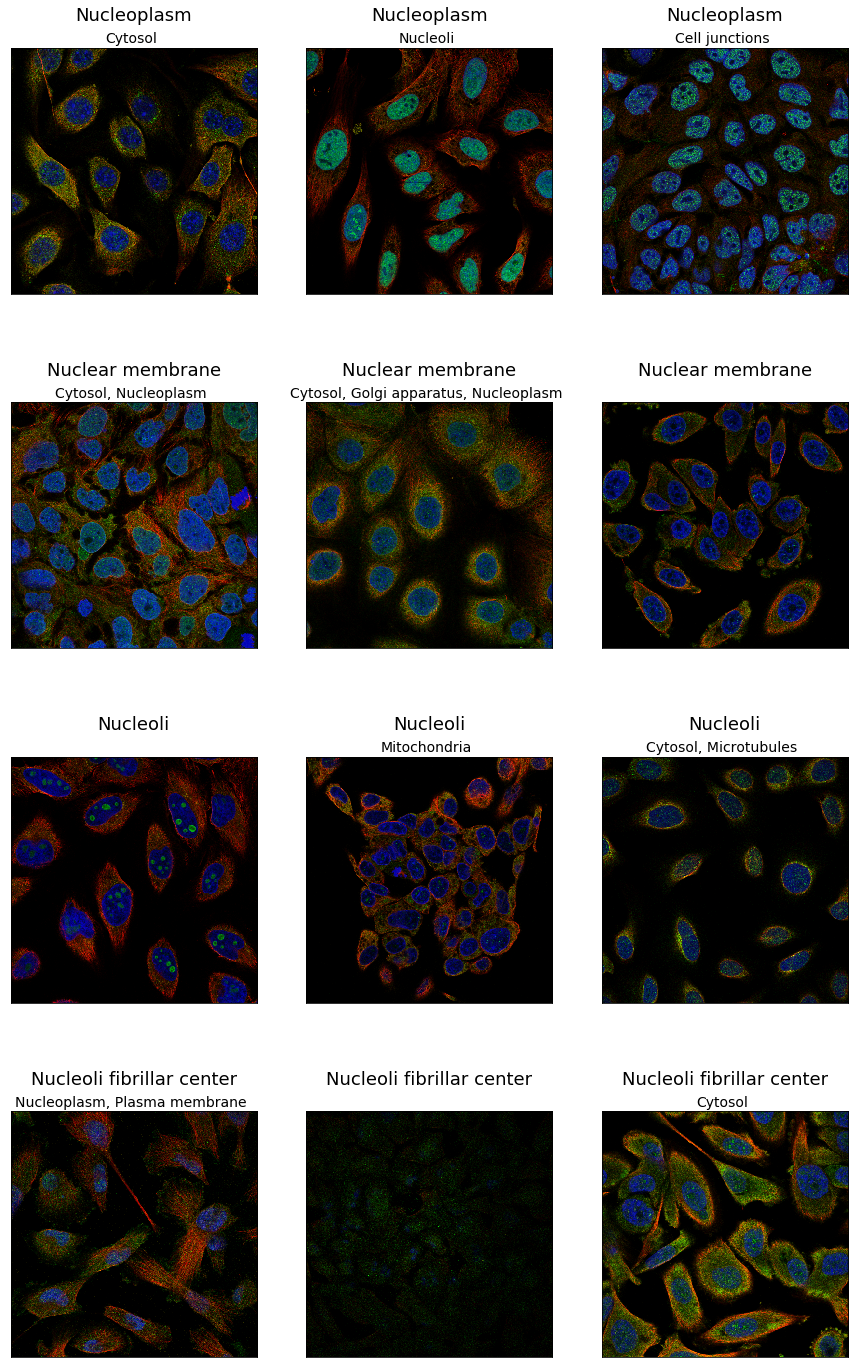

In [48]:
#visualize 3 examples for each class (4*3)
visualize_part(0)

In [62]:
#class study

import numpy as np
import pandas as pd 
import seaborn as sns
import os
from itertools import chain
from collections import Counter
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

#from keras.preprocessing.image import load_img
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
os.listdir('./Data/')

['Challenge3',
 'sample_submission.csv',
 'test',
 'test.zip',
 'train',
 'train.csv',
 'train.zip']

In [52]:
df = pd.read_csv('./Data/train.csv')
def count_target(target_val):
    return len(target_val.split(' '))

df['nclass'] = df.Target.map(count_target)
df.head()

Id   Target  nclass
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0       2
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0       4
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5       1
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1       1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18       1

In [53]:
#Function for plotting the images

def plot_img(img_id):
    filt_no = 0
    plt.figure(figsize=(30,60))
    plt.tight_layout()
    for filt in img_filt:
        img_path = train_img_path + img_id + filt
        img = np.array(load_img(img_path))
        plt.subplot(1,4,filt_no+1)
        plt.imshow(img)
        if i==0: plt.title(filt[1:-4]+' filter')
        plt.axis('off')
        filt_no += 1   

In [54]:
#Label Count Distribribution

label_count = []
for i in range(df.nclass.min(),df.nclass.max()+1):
    label_count.append(np.sum(df.nclass==i))
    print('No. of images with',i,'label:',label_count[-1])

No. of images with 1 label: 15126
No. of images with 2 label: 12485
No. of images with 3 label: 3160
No. of images with 4 label: 299
No. of images with 5 label: 2


Text(0.5,1,'Label Count Distribution in Train Set')

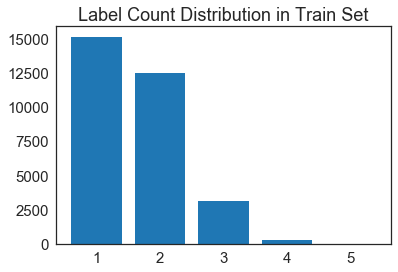

In [55]:
x = np.arange(len(label_count))+1
plt.bar(x,label_count)
plt.title('Label Count Distribution in Train Set')

In [57]:
#image 

os.listdir('./Data/train/')[:10]

['00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png',
 '00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png',
 '00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red.png',
 '00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_yellow.png',
 '000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png',
 '000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_green.png',
 '000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_red.png',
 '000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png',
 '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_blue.png',
 '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_green.png']

In [63]:
#Mapping the labels

def mk_list(val):
    return [int(label) for label in val.split(' ')]
df['target_list'] = df['Target'].map(mk_list)
all_labels = list(chain.from_iterable(df['target_list'].values))
label_count = Counter(all_labels)
arr = np.zeros((28,))
for key,value in label_count.items():
    arr[key] = value

In [64]:
map_class_labels = {0:  'Nucleoplasm',
1:  'Nuclear membrane',
2:  'Nucleoli',
3:  'Nucleoli fibrillar center',
4:  'Nuclear speckles',
5:  'Nuclear bodies',
6: 'Endoplasmic reticulum',
7:  'Golgi apparatus',
8:  'Peroxisomes',
9:  'Endosomes',
10:  'Lysosomes',
11:  'Intermediate filaments',
12:  'Actin filaments',
13:  'Focal adhesion sites',
14: 'Microtubules',
15: 'Microtubule ends',
16: 'Cytokinetic bridge',
17: 'Mitotic spindle',
18: 'Microtubule organizing center',
19: 'Centrosome',
20: 'Lipid droplets',
21: 'Plasma membrane',
22: 'Cell junctions',
23: 'Mitochondria',
24: 'Aggresome',
25: 'Cytosol',
26: 'Cytoplasmic bodies',
27: 'Rods and rings'}

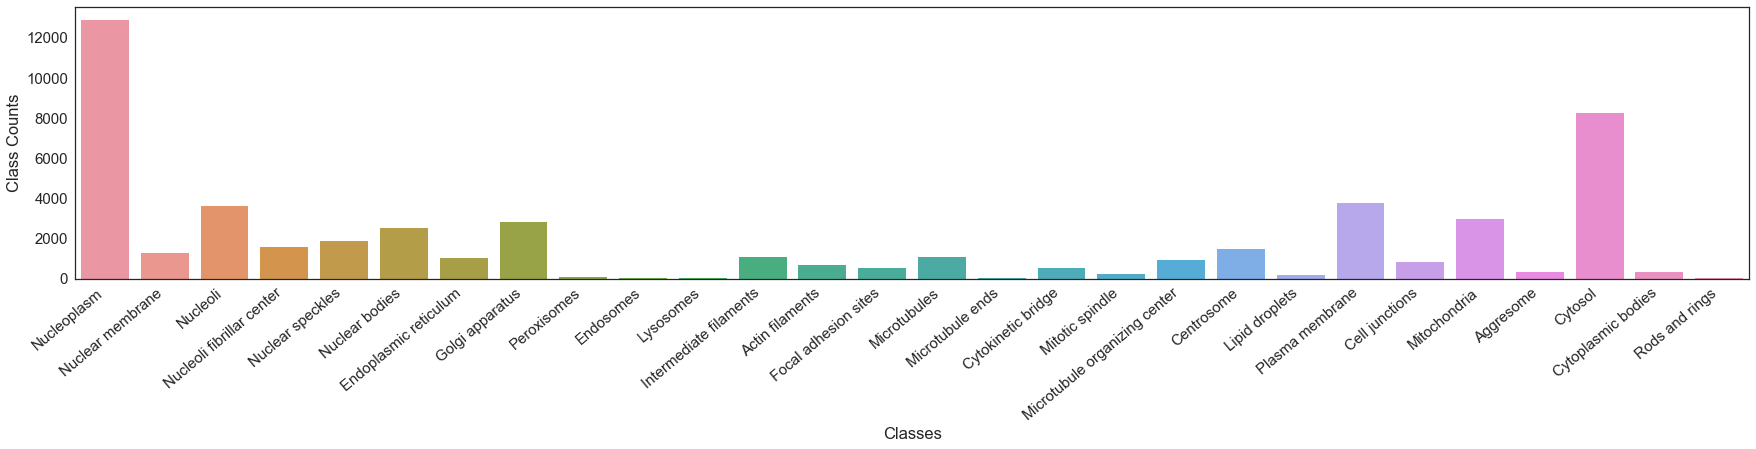

In [65]:
#graph class 

plt.figure(figsize=(30,5))
ax = sns.barplot(x=np.arange(28),y=arr)
ax.set_xticklabels(list(map_class_labels.values()), fontsize=15, rotation=40, ha="right")
ax.set(xlabel='Classes', ylabel='Class Counts')
plt.show()

In [3]:
#Plotting the image with the histogram

import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.gray()

import skimage.filters

import scipy.ndimage

import sklearn.feature_extraction
import sklearn.cluster

import skimage.feature
import skimage.transform

import PIL

import sys
for name, module in sorted(sys.modules.items()):
    if name in ['numpy', 'matplotlib', 'skimage', 'scipy', 'sklearn', 'PIL']:
        if hasattr(module, '__version__'): 
            print(name, module.__version__)


PIL 5.1.0
matplotlib 2.2.2
numpy 1.15.2
scipy 1.1.0
skimage 0.14.1
sklearn 0.19.1


<Figure size 432x288 with 0 Axes>

In [4]:
def plot_file(filename):
    image = plt.imread(filename)
    hist = np.histogram(image - image.mean(),
                        bins=np.arange(image.min(),
                                       image.max(),
                                       1/256))

    fig, axes = plt.subplots(1, 2, figsize=(8, 3))
    
    axes[0].imshow(image, interpolation='nearest')
    axes[0].axis('off')
    axes[0].set_title(filename[-20:])
    
    axes[1].plot(hist[1][:-1], hist[0], lw=2)
    axes[1].set_title('histogram of gray values')
    
    plt.show()

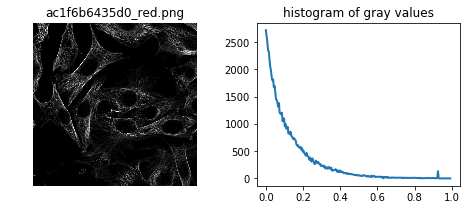

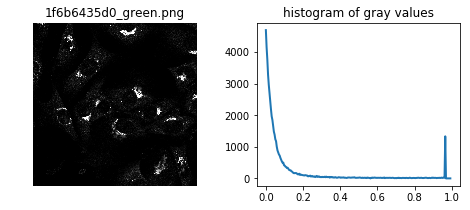

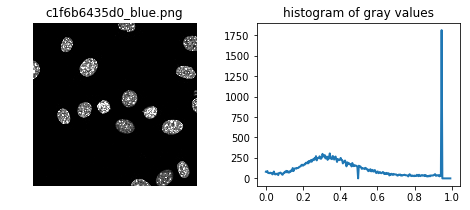

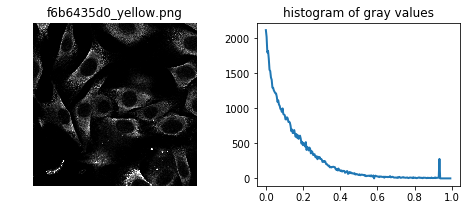

In [6]:
plot_file('./Data/train/002daad6-bbc9-11e8-b2bc-ac1f6b6435d0_red.png')
plot_file('./Data/train/002daad6-bbc9-11e8-b2bc-ac1f6b6435d0_green.png')
plot_file('./Data/train/002daad6-bbc9-11e8-b2bc-ac1f6b6435d0_blue.png')
plot_file('./Data/train/002daad6-bbc9-11e8-b2bc-ac1f6b6435d0_yellow.png')

In [20]:
#Other

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools as itt
import networkx as nx
from sklearn.preprocessing import MinMaxScaler


In [21]:
import sys
for name, module in sorted(sys.modules.items()):
    if name in ['numpy', 'pandas', 'seaborn', 'matplotlib', 'networkx', 'sklearn']:
        if hasattr(module, '__version__'): 
            print(name, module.__version__)

matplotlib 2.2.2
networkx 2.1
numpy 1.15.2
pandas 0.23.0
seaborn 0.8.1
sklearn 0.19.1


In [22]:
train_labels = pd.read_csv("./Data/train.csv")
train_labels.head()

Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [23]:
train_labels.shape[0]

31072

In [24]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

reverse_train_labels = dict((v,k) for k,v in label_names.items())

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

In [25]:
for key in label_names.keys():
    train_labels[label_names[key]] = 0
    
    

In [26]:
train_labels = train_labels.apply(fill_targets, axis=1)
train_labels.head()

Id        Target  Nucleoplasm  \
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0       [16, 0]            1   
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [7, 1, 2, 0]            1   
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0           [5]            0   
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0           [1]            0   
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0          [18]            0   

   Nuclear membrane  Nucleoli  Nucleoli fibrillar center  Nuclear speckles  \
0                 0         0                          0                 0   
1                 1         1                          0                 0   
2                 0         0                          0                 0   
3                 1         0                          0                 0   
4                 0         0                          0                 0   

   Nuclear bodies  Endoplasmic reticulum  Golgi apparatus      ...       \
0               0                      0                0      ...        
1               0                      0                1      ...        
2               1                      0                0      ...        
3               0                      0                0      ...        
4               0                      0                0      ...        

   Microtubule organizing center  Centrosome  Lipid droplets  Plasma membrane  \
0                              0           0               0                0   
1                              0           0               0                0   
2                              0           0               0                0   
3                              0           0               0                0   
4                              1           0               0                0   

   Cell junctions  Mitochondria  Aggresome  Cytosol  Cytoplasmic bodies  \
0               0             0          0        0                   0   
1               0             0          0        0                   0   
2               0             0          0        0                   0   
3               0             0          0        0                   0   
4               0             0          0        0                   0   

   Rods & rings  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 30 columns]

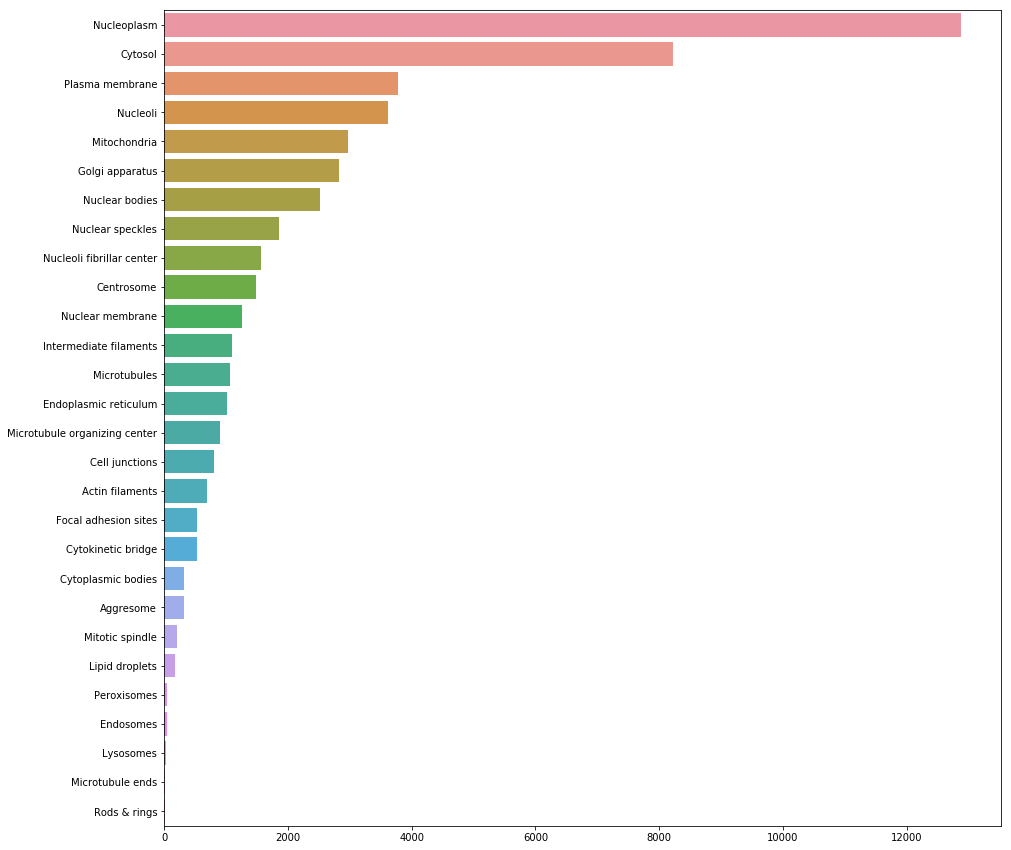

In [27]:
target_counts = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

In [28]:
target_counts.tail()

Peroxisomes         53
Endosomes           45
Lysosomes           28
Microtubule ends    21
Rods & rings        11
dtype: int64

In [32]:
train_labels["number_of_targets"] = train_labels.drop(["Id", "Target"],axis=1).sum(axis=1)

In [36]:
count_perc = train_labels.groupby("number_of_targets").count()['Id']
count_perc

number_of_targets
1    15126
2    12485
3     3160
4      299
5        2
Name: Id, dtype: int64

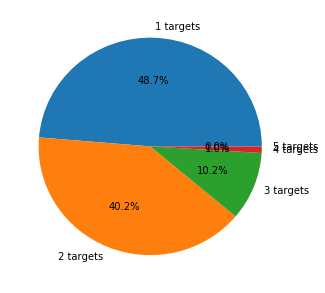

In [37]:
plt.figure(figsize=(5,5))
plt.pie(count_perc,
        labels=["%d targets" % x for x in count_perc.index],
        autopct='%1.1f%%')
plt.ylabel('');

In [114]:
#EXEMPLE DIGIT

In [95]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [97]:
labeled_images = pd.read_csv('./Dataa/train.csv')

In [98]:
labeled_images

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7          3       0       0       0       0       0       0       0       0   
8          5       0       0       0       0       0       0       0       0   
9          3       0       0       0       0       0       0       0       0   
10         8       0       0       0       0       0       0       0       0   
11         9       0       0       0       0       0       0       0       0   
12         1       0       0       0       0       0       0       0       0   
13         3       0       0       0       0       0       0       0       0   
14         3       0       0       0       0       0       0       0       0   
15         1       0       0       0       0       0       0       0       0   
16         2       0       0       0       0       0       0       0       0   
17         0       0       0       0       0       0       0       0       0   
18         7       0       0       0       0       0       0       0       0   
19         5       0       0       0       0       0       0       0       0   
20         8       0       0       0       0       0       0       0       0   
21         6       0       0       0       0       0       0       0       0   
22         2       0       0       0       0       0       0       0       0   
23         0       0       0       0       0       0       0       0       0   
24         2       0       0       0       0       0       0       0       0   
25         3       0       0       0       0       0       0       0       0   
26         6       0       0       0       0       0       0       0       0   
27         9       0       0       0       0       0       0       0       0   
28         9       0       0       0       0       0       0       0       0   
29         7       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41970      2       0       0       0       0       0       0       0       0   
41971      3       0       0       0       0       0       0       0       0   
41972      4       0       0       0       0       0       0       0       0   
41973      4       0       0       0       0       0       0       0       0   
41974      3       0       0       0       0       0       0       0       0   
41975      9       0       0       0       0       0       0       0       0   
41976      2       0       0       0       0       0       0       0       0   
41977      4       0       0       0       0       0       0       0       0   
41978      4       0       0       0       0       0       0       0       0   
41979      4       0       0       0       0       0       0       0       0   
41980      7       0       0       0       0       0       0       0       0   
41981      2       0       0       0       0       0       0       0       0   
41982      8       0       0       0       0       0       0       0       0   
41983      7       0       0       0       0       0       0       0       0   
41984      3       0       0       0       0       0       0       0       0   
41985      3       0       0       0       0       0       0       0       0   
41986      0       0       0       0       0       0       0       0       0   
41987      5       0       0       0       0       0       0       0       0   
41988  

In [99]:
images = labeled_images.iloc[0:5000,1:]

In [100]:
images

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          0       0       0       0       0       0       0       0       0   
7          0       0       0       0       0       0       0       0       0   
8          0       0       0       0       0       0       0       0       0   
9          0       0       0       0       0       0       0       0       0   
10         0       0       0       0       0       0       0       0       0   
11         0       0       0       0       0       0       0       0       0   
12         0       0       0       0       0       0       0       0       0   
13         0       0       0       0       0       0       0       0       0   
14         0       0       0       0       0       0       0       0       0   
15         0       0       0       0       0       0       0       0       0   
16         0       0       0       0       0       0       0       0       0   
17         0       0       0       0       0       0       0       0       0   
18         0       0       0       0       0       0       0       0       0   
19         0       0       0       0       0       0       0       0       0   
20         0       0       0       0       0       0       0       0       0   
21         0       0       0       0       0       0       0       0       0   
22         0       0       0       0       0       0       0       0       0   
23         0       0       0       0       0       0       0       0       0   
24         0       0       0       0       0       0       0       0       0   
25         0       0       0       0       0       0       0       0       0   
26         0       0       0       0       0       0       0       0       0   
27         0       0       0       0       0       0       0       0       0   
28         0       0       0       0       0       0       0       0       0   
29         0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
4970       0       0       0       0       0       0       0       0       0   
4971       0       0       0       0       0       0       0       0       0   
4972       0       0       0       0       0       0       0       0       0   
4973       0       0       0       0       0       0       0       0       0   
4974       0       0       0       0       0       0       0       0       0   
4975       0       0       0       0       0       0       0       0       0   
4976       0       0       0       0       0       0       0       0       0   
4977       0       0       0       0       0       0       0       0       0   
4978       0       0       0       0       0       0       0       0       0   
4979       0       0       0       0       0       0       0       0       0   
4980       0       0       0       0       0       0       0       0       0   
4981       0       0       0       0       0       0       0       0       0   
4982       0       0       0       0       0       0       0       0       0   
4983       0       0       0       0       0       0       0       0       0   
4984       0       0       0       0       0       0       0       0       0   
4985       0       0       0       0       0       0       0       0       0   
4986       0       0       0       0       0       0       0       0       0   
4987       0       0       0       0       0       0       0       0       0   
4988  

In [101]:
labels = labeled_images.iloc[0:5000,:1]

In [102]:
labels 

label
0         1
1         0
2         1
3         4
4         0
5         0
6         7
7         3
8         5
9         3
10        8
11        9
12        1
13        3
14        3
15        1
16        2
17        0
18        7
19        5
20        8
21        6
22        2
23        0
24        2
25        3
26        6
27        9
28        9
29        7
...     ...
4970      7
4971      7
4972      2
4973      8
4974      3
4975      8
4976      3
4977      6
4978      7
4979      7
4980      3
4981      6
4982      7
4983      0
4984      9
4985      1
4986      3
4987      0
4988      2
4989      8
4990      7
4991      1
4992      4
4993      0
4994      7
4995      2
4996      5
4997      8
4998      7
4999      9

[5000 rows x 1 columns]

In [103]:
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

C:\Users\victor\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


C:\Users\victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0.5,1,'6')

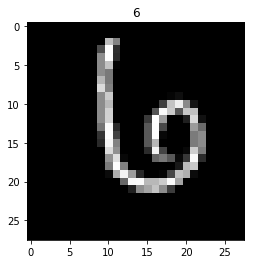

In [105]:
i=1
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

(array([682.,   9.,  10.,   7.,  10.,  18.,   7.,  17.,   7.,  17.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

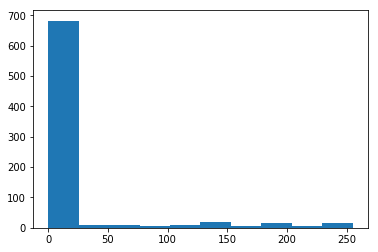

In [106]:
plt.hist(train_images.iloc[i])

In [107]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.1

C:\Users\victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\victor\Anaconda3\lib\site-packages\pandas\core\frame.py:3160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\Users\victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

Text(0.5,1,'label    6\nName: 3275, dtype: int64')

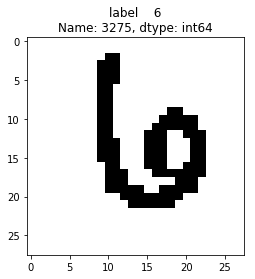

In [108]:
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])

(array([668.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

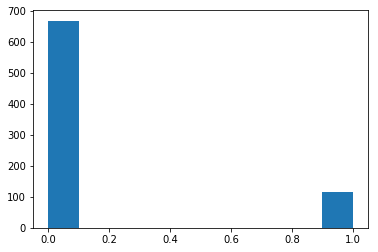

In [109]:
plt.hist(train_images.iloc[i])

In [110]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.887

In [111]:
test_data=pd.read_csv('./Dataa/test.csv')
test_data[test_data>0]=1
results=clf.predict(test_data[0:5000])

In [112]:
results

array([2, 0, 9, ..., 1, 7, 3], dtype=int64)

In [113]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)

In [127]:
#sklearn from digit 
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline
#ici

In [128]:
labeled_images = pd.read_csv('./Data/train.csv')

In [130]:
labeled_images.Id

0        00070df0-bbc3-11e8-b2bc-ac1f6b6435d0
1        000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0
2        000a9596-bbc4-11e8-b2bc-ac1f6b6435d0
3        000c99ba-bba4-11e8-b2b9-ac1f6b6435d0
4        001838f8-bbca-11e8-b2bc-ac1f6b6435d0
5        001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0
6        0020af02-bbba-11e8-b2ba-ac1f6b6435d0
7        002679c2-bbb6-11e8-b2ba-ac1f6b6435d0
8        00285ce4-bba0-11e8-b2b9-ac1f6b6435d0
9        002daad6-bbc9-11e8-b2bc-ac1f6b6435d0
10       002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0
11       00301238-bbb2-11e8-b2ba-ac1f6b6435d0
12       0032a07e-bba9-11e8-b2ba-ac1f6b6435d0
13       00344514-bbc2-11e8-b2bb-ac1f6b6435d0
14       00357b1e-bba9-11e8-b2ba-ac1f6b6435d0
15       00383b44-bbbb-11e8-b2ba-ac1f6b6435d0
16       0038d6a6-bb9a-11e8-b2b9-ac1f6b6435d0
17       003957a8-bbb7-11e8-b2ba-ac1f6b6435d0
18       003feb6e-bbca-11e8-b2bc-ac1f6b6435d0
19       0042017c-bba4-11e8-b2b9-ac1f6b6435d0
20       00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0
21       0047c984-bba6-11e8-b2ba-a

In [131]:
labeled_images.Target

0           16 0
1        7 1 2 0
2              5
3              1
4             18
5              0
6           25 2
7              0
8            2 0
9              7
10            23
11            21
12          24 0
13            23
14           6 2
15            25
16          25 0
17            25
18             0
19         25 11
20       7 1 2 0
21            11
22          25 2
23          25 0
24          25 3
25          16 6
26          25 2
27            23
28            25
29          12 0
          ...   
31042    25 18 0
31043     25 2 0
31044          0
31045       11 0
31046          0
31047        7 0
31048          4
31049        3 0
31050       25 7
31051     19 2 0
31052       25 7
31053          0
31054          5
31055       25 0
31056     25 3 0
31057         25
31058          4
31059          0
31060         23
31061          0
31062      16 14
31063        5 0
31064      19 23
31065         18
31066       25 0
31067         21
31068          5
31069         

In [132]:
labeled_images

Id   Target
0      00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1      000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2      000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3      000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4      001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18
5      001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0        0
6      0020af02-bbba-11e8-b2ba-ac1f6b6435d0     25 2
7      002679c2-bbb6-11e8-b2ba-ac1f6b6435d0        0
8      00285ce4-bba0-11e8-b2b9-ac1f6b6435d0      2 0
9      002daad6-bbc9-11e8-b2bc-ac1f6b6435d0        7
10     002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0       23
11     00301238-bbb2-11e8-b2ba-ac1f6b6435d0       21
12     0032a07e-bba9-11e8-b2ba-ac1f6b6435d0     24 0
13     00344514-bbc2-11e8-b2bb-ac1f6b6435d0       23
14     00357b1e-bba9-11e8-b2ba-ac1f6b6435d0      6 2
15     00383b44-bbbb-11e8-b2ba-ac1f6b6435d0       25
16     0038d6a6-bb9a-11e8-b2b9-ac1f6b6435d0     25 0
17     003957a8-bbb7-11e8-b2ba-ac1f6b6435d0       25
18     003feb6e-bbca-11e8-b2bc-ac1f6b6435d0        0
19     0042017c-bba4-11e8-b2b9-ac1f6b6435d0    25 11
20     00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
21     0047c984-bba6-11e8-b2ba-ac1f6b6435d0       11
22     00481c70-bba3-11e8-b2b9-ac1f6b6435d0     25 2
23     004a2b84-bbc4-11e8-b2bc-ac1f6b6435d0     25 0
24     004b47de-bbca-11e8-b2bc-ac1f6b6435d0     25 3
25     004bf4c6-bbc6-11e8-b2bc-ac1f6b6435d0     16 6
26     004d8a0e-bbc4-11e8-b2bc-ac1f6b6435d0     25 2
27     004efaa2-bba5-11e8-b2ba-ac1f6b6435d0       23
28     004f7c66-bb9b-11e8-b2b9-ac1f6b6435d0       25
29     004f8abc-bbb9-11e8-b2ba-ac1f6b6435d0     12 0
...                                     ...      ...
31042  ffb00d58-bba3-11e8-b2b9-ac1f6b6435d0  25 18 0
31043  ffb49f82-bbab-11e8-b2ba-ac1f6b6435d0   25 2 0
31044  ffb5effa-bbaf-11e8-b2ba-ac1f6b6435d0        0
31045  ffb610c6-bbb8-11e8-b2ba-ac1f6b6435d0     11 0
31046  ffb6fb76-bba9-11e8-b2ba-ac1f6b6435d0        0
31047  ffb74ef0-bbae-11e8-b2ba-ac1f6b6435d0      7 0
31048  ffbebc4e-bb9a-11e8-b2b9-ac1f6b6435d0        4
31049  ffc30612-bbbf-11e8-b2bb-ac1f6b6435d0      3 0
31050  ffc8820a-bbc8-11e8-b2bc-ac1f6b6435d0     25 7
31051  ffcebbc8-bbc5-11e8-b2bc-ac1f6b6435d0   19 2 0
31052  ffced1a2-bbad-11e8-b2ba-ac1f6b6435d0     25 7
31053  ffcf84d6-bbac-11e8-b2ba-ac1f6b6435d0        0
31054  ffd23be4-bba3-11e8-b2b9-ac1f6b6435d0        5
31055  ffd298f4-bbc7-11e8-b2bc-ac1f6b6435d0     25 0
31056  ffd2b880-bba8-11e8-b2ba-ac1f6b6435d0   25 3 0
31057  ffd45d0c-bbad-11e8-b2ba-ac1f6b6435d0       25
31058  ffd96262-bbc0-11e8-b2bb-ac1f6b6435d0        4
31059  ffdb9014-bba2-11e8-b2b9-ac1f6b6435d0        0
31060  ffdbe064-bbbb-11e8-b2ba-ac1f6b6435d0       23
31061  ffdcc5e4-bbaa-11e8-b2ba-ac1f6b6435d0        0
31062  ffe454e6-bb99-11e8-b2b9-ac1f6b6435d0    16 14
31063  ffe55eba-bbba-11e8-b2ba-ac1f6b6435d0      5 0
31064  ffe61798-bbc3-11e8-b2bc-ac1f6b6435d0    19 23
31065  ffe8cf0c-bba9-11e8-b2ba-ac1f6b6435d0       18
31066  ffeae6f0-bbc9-11e8-b2bc-ac1f6b6435d0     25 0
31067  ffed4430-bbac-11e8-b2ba-ac1f6b6435d0       21
31068  fff0a998-bbae-11e8-b2ba-ac1f6b6435d0        5
31069  fff189d8-bbab-11e8-b2ba-ac1f6b6435d0        7
31070  fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0  25 2 21
31071  fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0      2 0

[31072 rows x 2 columns]

In [136]:
Images=[imread('./Data/train/'+x+'_green.png', as_gray=True) for x in labeled_images.Id]
print(Images[0].shape)
labeled_images['Image']=Images

Target
Id                                           
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [ ]:
labeled_images

In [138]:
df=pd.read_csv('./Data/train.csv', index_col=0)
df.head()

Target
Id                                           
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [137]:
images=[imread('./Data/train/'+x+'_green.png', as_gray=True) for x in df.index]
print(images[0].shape)
df['Image']=images

MemoryError: 

In [93]:
labels = labeled_images.iloc[0:5000,1:]

In [94]:
labels

Target
0         16 0
1      7 1 2 0
2            5
3            1
4           18
5            0
6         25 2
7            0
8          2 0
9            7
10          23
11          21
12        24 0
13          23
14         6 2
15          25
16        25 0
17          25
18           0
19       25 11
20     7 1 2 0
21          11
22        25 2
23        25 0
24        25 3
25        16 6
26        25 2
27          23
28          25
29        12 0
...        ...
4970         0
4971      0 21
4972      25 0
4973      25 1
4974        25
4975        18
4976         3
4977        23
4978         5
4979        18
4980        12
4981      22 0
4982        18
4983      25 0
4984         5
4985     7 2 0
4986       7 0
4987        21
4988        24
4989     1 2 0
4990     25 13
4991        25
4992        25
4993        25
4994  16 25 14
4995      19 0
4996       2 0
4997         0
4998         7
4999         0

[5000 rows x 1 columns]

In [ ]:

labels = labeled_images.iloc[0:5000,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

In [2]:
#SKLEARN
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from skimage.io import imread
import cv2
from skimage.transform import resize
from sklearn.model_selection import StratifiedKFold

In [84]:
df=pd.read_csv('./Data/train.csv', index_col=None )
df.head()
#header=0

Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [85]:
df.index

RangeIndex(start=0, stop=31072, step=1)

In [86]:
df.Id

0        00070df0-bbc3-11e8-b2bc-ac1f6b6435d0
1        000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0
2        000a9596-bbc4-11e8-b2bc-ac1f6b6435d0
3        000c99ba-bba4-11e8-b2b9-ac1f6b6435d0
4        001838f8-bbca-11e8-b2bc-ac1f6b6435d0
5        001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0
6        0020af02-bbba-11e8-b2ba-ac1f6b6435d0
7        002679c2-bbb6-11e8-b2ba-ac1f6b6435d0
8        00285ce4-bba0-11e8-b2b9-ac1f6b6435d0
9        002daad6-bbc9-11e8-b2bc-ac1f6b6435d0
10       002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0
11       00301238-bbb2-11e8-b2ba-ac1f6b6435d0
12       0032a07e-bba9-11e8-b2ba-ac1f6b6435d0
13       00344514-bbc2-11e8-b2bb-ac1f6b6435d0
14       00357b1e-bba9-11e8-b2ba-ac1f6b6435d0
15       00383b44-bbbb-11e8-b2ba-ac1f6b6435d0
16       0038d6a6-bb9a-11e8-b2b9-ac1f6b6435d0
17       003957a8-bbb7-11e8-b2ba-ac1f6b6435d0
18       003feb6e-bbca-11e8-b2bc-ac1f6b6435d0
19       0042017c-bba4-11e8-b2b9-ac1f6b6435d0
20       00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0
21       0047c984-bba6-11e8-b2ba-a

In [87]:
df.Target

0           16 0
1        7 1 2 0
2              5
3              1
4             18
5              0
6           25 2
7              0
8            2 0
9              7
10            23
11            21
12          24 0
13            23
14           6 2
15            25
16          25 0
17            25
18             0
19         25 11
20       7 1 2 0
21            11
22          25 2
23          25 0
24          25 3
25          16 6
26          25 2
27            23
28            25
29          12 0
          ...   
31042    25 18 0
31043     25 2 0
31044          0
31045       11 0
31046          0
31047        7 0
31048          4
31049        3 0
31050       25 7
31051     19 2 0
31052       25 7
31053          0
31054          5
31055       25 0
31056     25 3 0
31057         25
31058          4
31059          0
31060         23
31061          0
31062      16 14
31063        5 0
31064      19 23
31065         18
31066       25 0
31067         21
31068          5
31069         

In [4]:
images=[imread('./Data/train/'+x+'_green.png', as_gray=True) for x in df.index]
print(images[0].shape)
df['Image']=images

(512, 512)


In [55]:
df.Image

AttributeError: 'DataFrame' object has no attribute 'Image'

In [5]:
from skimage.filters import try_all_threshold

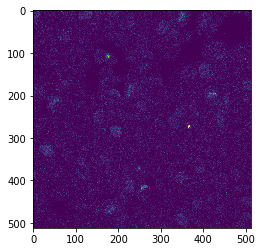

In [6]:
plt.imshow(df.iloc[0, 1])
plt.show()

In [7]:
plt.show()

In [8]:
images[0].shape

In [18]:
df

Target  \
Id                                              
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0   
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5   
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18   
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0        0   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0     25 2   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0        0   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0      2 0   
002daad6-bbc9-11e8-b2bc-ac1f6b6435d0        7   
002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0       23   
00301238-bbb2-11e8-b2ba-ac1f6b6435d0       21   
0032a07e-bba9-11e8-b2ba-ac1f6b6435d0     24 0   
00344514-bbc2-11e8-b2bb-ac1f6b6435d0       23   
00357b1e-bba9-11e8-b2ba-ac1f6b6435d0      6 2   
00383b44-bbbb-11e8-b2ba-ac1f6b6435d0       25   
0038d6a6-bb9a-11e8-b2b9-ac1f6b6435d0     25 0   
003957a8-bbb7-11e8-b2ba-ac1f6b6435d0       25   
003feb6e-bbca-11e8-b2bc-ac1f6b6435d0        0   
0042017c-bba4-11e8-b2b9-ac1f6b6435d0    25 11   
00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
0047c984-bba6-11e8-b2ba-ac1f6b6435d0       11   
00481c70-bba3-11e8-b2b9-ac1f6b6435d0     25 2   
004a2b84-bbc4-11e8-b2bc-ac1f6b6435d0     25 0   
004b47de-bbca-11e8-b2bc-ac1f6b6435d0     25 3   
004bf4c6-bbc6-11e8-b2bc-ac1f6b6435d0     16 6   
004d8a0e-bbc4-11e8-b2bc-ac1f6b6435d0     25 2   
004efaa2-bba5-11e8-b2ba-ac1f6b6435d0       23   
004f7c66-bb9b-11e8-b2b9-ac1f6b6435d0       25   
004f8abc-bbb9-11e8-b2ba-ac1f6b6435d0     12 0   
...                                       ...   
ffb00d58-bba3-11e8-b2b9-ac1f6b6435d0  25 18 0   
ffb49f82-bbab-11e8-b2ba-ac1f6b6435d0   25 2 0   
ffb5effa-bbaf-11e8-b2ba-ac1f6b6435d0        0   
ffb610c6-bbb8-11e8-b2ba-ac1f6b6435d0     11 0   
ffb6fb76-bba9-11e8-b2ba-ac1f6b6435d0        0   
ffb74ef0-bbae-11e8-b2ba-ac1f6b6435d0      7 0   
ffbebc4e-bb9a-11e8-b2b9-ac1f6b6435d0        4   
ffc30612-bbbf-11e8-b2bb-ac1f6b6435d0      3 0   
ffc8820a-bbc8-11e8-b2bc-ac1f6b6435d0     25 7   
ffcebbc8-bbc5-11e8-b2bc-ac1f6b6435d0   19 2 0   
ffced1a2-bbad-11e8-b2ba-ac1f6b6435d0     25 7   
ffcf84d6-bbac-11e8-b2ba-ac1f6b6435d0        0   
ffd23be4-bba3-11e8-b2b9-ac1f6b6435d0        5   
ffd298f4-bbc7-11e8-b2bc-ac1f6b6435d0     25 0   
ffd2b880-bba8-11e8-b2ba-ac1f6b6435d0   25 3 0   
ffd45d0c-bbad-11e8-b2ba-ac1f6b6435d0       25   
ffd96262-bbc0-11e8-b2bb-ac1f6b6435d0        4   
ffdb9014-bba2-11e8-b2b9-ac1f6b6435d0        0   
ffdbe064-bbbb-11e8-b2ba-ac1f6b6435d0       23   
ffdcc5e4-bbaa-11e8-b2ba-ac1f6b6435d0        0   
ffe454e6-bb99-11e8-b2b9-ac1f6b6435d0    16 14   
ffe55eba-bbba-11e8-b2ba-ac1f6b6435d0      5 0   
ffe61798-bbc3-11e8-b2bc-ac1f6b6435d0    19 23   
ffe8cf0c-bba9-11e8-b2ba-ac1f6b6435d0       18   
ffeae6f0-bbc9-11e8-b2bc-ac1f6b6435d0     25 0   
ffed4430-bbac-11e8-b2ba-ac1f6b6435d0       21   
fff0a998-bbae-11e8-b2ba-ac1f6b6435d0        5   
fff189d8-bbab-11e8-b2ba-ac1f6b6435d0        7   
fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0  25 2 21   
fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0      2 0   

                                                                                  Image  
Id                                                                                       
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0  [[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,...  
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [[1, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,...  
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
001838f8-bbca-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0  [[36, 22, 14, 49, 36, 60, 56, 28, 28, 33, 17, ...  
0020af02-bbba-11e8-b2ba-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0  [[0, 0, 0, 0,

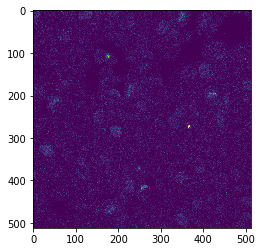

In [19]:
plt.imshow(df.iloc[0, 1])

In [20]:
A=3

In [21]:
A

3

In [22]:
images 

[array([[ 9,  6, 27, ...,  1,  0,  0],
        [ 3, 20, 20, ...,  0,  0,  0],
        [52, 15, 36, ..., 17,  0,  0],
        ...,
        [10,  0,  2, ...,  4,  0,  2],
        [14,  4,  3, ...,  0, 15,  1],
        [ 1, 16,  1, ...,  0,  9,  0]], dtype=uint8),
 array([[1, 1, 1, ..., 0, 1, 4],
        [1, 0, 0, ..., 0, 0, 1],
        [2, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 2],
        [0, 0, 0, ..., 9, 0, 0],
        [0, 0, 0, ..., 0, 5, 5]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 0,  0,  0, ..., 32, 51, 15],
        [ 0,  0,  0, ..., 38, 81, 48],
        [ 0,  0,  0, ..., 38, 57, 32],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
 array([[ 0,  0,  0, ...

In [12]:
Id

NameError: name 'Id' is not defined

In [14]:
Target

NameError: name 'Target' is not defined

In [15]:
df.Id.shape

AttributeError: 'DataFrame' object has no attribute 'Id'

In [16]:
df[:,0]

TypeError: unhashable type: 'slice'

In [16]:
df

Target  \
Id                                              
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0   
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5   
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18   
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0        0   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0     25 2   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0        0   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0      2 0   
002daad6-bbc9-11e8-b2bc-ac1f6b6435d0        7   
002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0       23   
00301238-bbb2-11e8-b2ba-ac1f6b6435d0       21   
0032a07e-bba9-11e8-b2ba-ac1f6b6435d0     24 0   
00344514-bbc2-11e8-b2bb-ac1f6b6435d0       23   
00357b1e-bba9-11e8-b2ba-ac1f6b6435d0      6 2   
00383b44-bbbb-11e8-b2ba-ac1f6b6435d0       25   
0038d6a6-bb9a-11e8-b2b9-ac1f6b6435d0     25 0   
003957a8-bbb7-11e8-b2ba-ac1f6b6435d0       25   
003feb6e-bbca-11e8-b2bc-ac1f6b6435d0        0   
0042017c-bba4-11e8-b2b9-ac1f6b6435d0    25 11   
00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
0047c984-bba6-11e8-b2ba-ac1f6b6435d0       11   
00481c70-bba3-11e8-b2b9-ac1f6b6435d0     25 2   
004a2b84-bbc4-11e8-b2bc-ac1f6b6435d0     25 0   
004b47de-bbca-11e8-b2bc-ac1f6b6435d0     25 3   
004bf4c6-bbc6-11e8-b2bc-ac1f6b6435d0     16 6   
004d8a0e-bbc4-11e8-b2bc-ac1f6b6435d0     25 2   
004efaa2-bba5-11e8-b2ba-ac1f6b6435d0       23   
004f7c66-bb9b-11e8-b2b9-ac1f6b6435d0       25   
004f8abc-bbb9-11e8-b2ba-ac1f6b6435d0     12 0   
...                                       ...   
ffb00d58-bba3-11e8-b2b9-ac1f6b6435d0  25 18 0   
ffb49f82-bbab-11e8-b2ba-ac1f6b6435d0   25 2 0   
ffb5effa-bbaf-11e8-b2ba-ac1f6b6435d0        0   
ffb610c6-bbb8-11e8-b2ba-ac1f6b6435d0     11 0   
ffb6fb76-bba9-11e8-b2ba-ac1f6b6435d0        0   
ffb74ef0-bbae-11e8-b2ba-ac1f6b6435d0      7 0   
ffbebc4e-bb9a-11e8-b2b9-ac1f6b6435d0        4   
ffc30612-bbbf-11e8-b2bb-ac1f6b6435d0      3 0   
ffc8820a-bbc8-11e8-b2bc-ac1f6b6435d0     25 7   
ffcebbc8-bbc5-11e8-b2bc-ac1f6b6435d0   19 2 0   
ffced1a2-bbad-11e8-b2ba-ac1f6b6435d0     25 7   
ffcf84d6-bbac-11e8-b2ba-ac1f6b6435d0        0   
ffd23be4-bba3-11e8-b2b9-ac1f6b6435d0        5   
ffd298f4-bbc7-11e8-b2bc-ac1f6b6435d0     25 0   
ffd2b880-bba8-11e8-b2ba-ac1f6b6435d0   25 3 0   
ffd45d0c-bbad-11e8-b2ba-ac1f6b6435d0       25   
ffd96262-bbc0-11e8-b2bb-ac1f6b6435d0        4   
ffdb9014-bba2-11e8-b2b9-ac1f6b6435d0        0   
ffdbe064-bbbb-11e8-b2ba-ac1f6b6435d0       23   
ffdcc5e4-bbaa-11e8-b2ba-ac1f6b6435d0        0   
ffe454e6-bb99-11e8-b2b9-ac1f6b6435d0    16 14   
ffe55eba-bbba-11e8-b2ba-ac1f6b6435d0      5 0   
ffe61798-bbc3-11e8-b2bc-ac1f6b6435d0    19 23   
ffe8cf0c-bba9-11e8-b2ba-ac1f6b6435d0       18   
ffeae6f0-bbc9-11e8-b2bc-ac1f6b6435d0     25 0   
ffed4430-bbac-11e8-b2ba-ac1f6b6435d0       21   
fff0a998-bbae-11e8-b2ba-ac1f6b6435d0        5   
fff189d8-bbab-11e8-b2ba-ac1f6b6435d0        7   
fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0  25 2 21   
fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0      2 0   

                                                                                  Image  
Id                                                                                       
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0  [[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,...  
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [[1, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,...  
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
001838f8-bbca-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0  [[36, 22, 14, 49, 36, 60, 56, 28, 28, 33, 17, ...  
0020af02-bbba-11e8-b2ba-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0  [[0, 0, 0, 0,

In [18]:
df.iloc[0,:]

Target                                                 16 0
Image     [[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,...
Name: 00070df0-bbc3-11e8-b2bc-ac1f6b6435d0, dtype: object

In [19]:
df.Target

Id
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0       16 0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0    7 1 2 0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0          5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0          1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0         18
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0          0
0020af02-bbba-11e8-b2ba-ac1f6b6435d0       25 2
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0          0
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0        2 0
002daad6-bbc9-11e8-b2bc-ac1f6b6435d0          7
002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0         23
00301238-bbb2-11e8-b2ba-ac1f6b6435d0         21
0032a07e-bba9-11e8-b2ba-ac1f6b6435d0       24 0
00344514-bbc2-11e8-b2bb-ac1f6b6435d0         23
00357b1e-bba9-11e8-b2ba-ac1f6b6435d0        6 2
00383b44-bbbb-11e8-b2ba-ac1f6b6435d0         25
0038d6a6-bb9a-11e8-b2b9-ac1f6b6435d0       25 0
003957a8-bbb7-11e8-b2ba-ac1f6b6435d0         25
003feb6e-bbca-11e8-b2bc-ac1f6b6435d0          0
0042017c-bba4-11e8-b2b9-ac1f6b6435d0      25 11
00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0 

In [20]:
df.Image

Id
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0    [[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,...
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0    [[1, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,...
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
001838f8-bbca-11e8-b2bc-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0    [[36, 22, 14, 49, 36, 60, 56, 28, 28, 33, 17, ...
0020af02-bbba-11e8-b2ba-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0,...
002daad6-bbc9-11e8-b2bc-ac1f6b6435d0    [[0, 0, 0, 0, 0, 1, 0, 5, 33, 7, 7, 3, 15, 26,...
002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
0030123

In [21]:
df.Id

AttributeError: 'DataFrame' object has no attribute 'Id'

In [22]:
df.name

AttributeError: 'DataFrame' object has no attribute 'name'

In [23]:
df.Image[0,:]

ValueError: Can only tuple-index with a MultiIndex

In [24]:
df.Target

Id
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0       16 0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0    7 1 2 0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0          5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0          1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0         18
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0          0
0020af02-bbba-11e8-b2ba-ac1f6b6435d0       25 2
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0          0
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0        2 0
002daad6-bbc9-11e8-b2bc-ac1f6b6435d0          7
002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0         23
00301238-bbb2-11e8-b2ba-ac1f6b6435d0         21
0032a07e-bba9-11e8-b2ba-ac1f6b6435d0       24 0
00344514-bbc2-11e8-b2bb-ac1f6b6435d0         23
00357b1e-bba9-11e8-b2ba-ac1f6b6435d0        6 2
00383b44-bbbb-11e8-b2ba-ac1f6b6435d0         25
0038d6a6-bb9a-11e8-b2b9-ac1f6b6435d0       25 0
003957a8-bbb7-11e8-b2ba-ac1f6b6435d0         25
003feb6e-bbca-11e8-b2bc-ac1f6b6435d0          0
0042017c-bba4-11e8-b2b9-ac1f6b6435d0      25 11
00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0 

In [25]:
images

[array([[ 9,  6, 27, ...,  1,  0,  0],
        [ 3, 20, 20, ...,  0,  0,  0],
        [52, 15, 36, ..., 17,  0,  0],
        ...,
        [10,  0,  2, ...,  4,  0,  2],
        [14,  4,  3, ...,  0, 15,  1],
        [ 1, 16,  1, ...,  0,  9,  0]], dtype=uint8),
 array([[1, 1, 1, ..., 0, 1, 4],
        [1, 0, 0, ..., 0, 0, 1],
        [2, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 2],
        [0, 0, 0, ..., 9, 0, 0],
        [0, 0, 0, ..., 0, 5, 5]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 0,  0,  0, ..., 32, 51, 15],
        [ 0,  0,  0, ..., 38, 81, 48],
        [ 0,  0,  0, ..., 38, 57, 32],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
 array([[ 0,  0,  0, ...

In [26]:
df.Image.shape

(31072,)

In [27]:
df.Target.shape

(31072,)

In [28]:
df.Image[0:5]

Id
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0    [[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,...
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0    [[1, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,...
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
001838f8-bbca-11e8-b2bc-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: Image, dtype: object

In [31]:
label

'16 0'

In [35]:
df.Image[2:6]

Id
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
001838f8-bbca-11e8-b2bc-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0    [[36, 22, 14, 49, 36, 60, 56, 28, 28, 33, 17, ...
Name: Image, dtype: object

In [63]:
df.Target[2:6]

Id
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0     5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0     1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0    18
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0     0
Name: Target, dtype: object

In [64]:
label

'0'

In [65]:
label

'0'

In [69]:
 df.Target[0:]

Id
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0       16 0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0    7 1 2 0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0          5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0          1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0         18
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0          0
0020af02-bbba-11e8-b2ba-ac1f6b6435d0       25 2
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0          0
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0        2 0
002daad6-bbc9-11e8-b2bc-ac1f6b6435d0          7
002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0         23
00301238-bbb2-11e8-b2ba-ac1f6b6435d0         21
0032a07e-bba9-11e8-b2ba-ac1f6b6435d0       24 0
00344514-bbc2-11e8-b2bb-ac1f6b6435d0         23
00357b1e-bba9-11e8-b2ba-ac1f6b6435d0        6 2
00383b44-bbbb-11e8-b2ba-ac1f6b6435d0         25
0038d6a6-bb9a-11e8-b2b9-ac1f6b6435d0       25 0
003957a8-bbb7-11e8-b2ba-ac1f6b6435d0         25
003feb6e-bbca-11e8-b2bc-ac1f6b6435d0          0
0042017c-bba4-11e8-b2b9-ac1f6b6435d0      25 11
00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0 

In [23]:
df.head()

Target  \
Id                                              
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0   
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5   
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18   

                                                                                  Image  
Id                                                                                       
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0  [[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,...  
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [[1, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,...  
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
001838f8-bbca-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

In [34]:
df.Image[2:6]

Id
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
001838f8-bbca-11e8-b2bc-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0    [[36, 22, 14, 49, 36, 60, 56, 28, 28, 33, 17, ...
Name: Image, dtype: object

In [35]:
df.Target[2:6]

Id
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0     5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0     1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0    18
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0     0
Name: Target, dtype: object

In [36]:
df

Target  \
Id                                              
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0   
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5   
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18   
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0        0   
0020af02-bbba-11e8-b2ba-ac1f6b6435d0     25 2   
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0        0   
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0      2 0   
002daad6-bbc9-11e8-b2bc-ac1f6b6435d0        7   
002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0       23   
00301238-bbb2-11e8-b2ba-ac1f6b6435d0       21   
0032a07e-bba9-11e8-b2ba-ac1f6b6435d0     24 0   
00344514-bbc2-11e8-b2bb-ac1f6b6435d0       23   
00357b1e-bba9-11e8-b2ba-ac1f6b6435d0      6 2   
00383b44-bbbb-11e8-b2ba-ac1f6b6435d0       25   
0038d6a6-bb9a-11e8-b2b9-ac1f6b6435d0     25 0   
003957a8-bbb7-11e8-b2ba-ac1f6b6435d0       25   
003feb6e-bbca-11e8-b2bc-ac1f6b6435d0        0   
0042017c-bba4-11e8-b2b9-ac1f6b6435d0    25 11   
00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
0047c984-bba6-11e8-b2ba-ac1f6b6435d0       11   
00481c70-bba3-11e8-b2b9-ac1f6b6435d0     25 2   
004a2b84-bbc4-11e8-b2bc-ac1f6b6435d0     25 0   
004b47de-bbca-11e8-b2bc-ac1f6b6435d0     25 3   
004bf4c6-bbc6-11e8-b2bc-ac1f6b6435d0     16 6   
004d8a0e-bbc4-11e8-b2bc-ac1f6b6435d0     25 2   
004efaa2-bba5-11e8-b2ba-ac1f6b6435d0       23   
004f7c66-bb9b-11e8-b2b9-ac1f6b6435d0       25   
004f8abc-bbb9-11e8-b2ba-ac1f6b6435d0     12 0   
...                                       ...   
ffb00d58-bba3-11e8-b2b9-ac1f6b6435d0  25 18 0   
ffb49f82-bbab-11e8-b2ba-ac1f6b6435d0   25 2 0   
ffb5effa-bbaf-11e8-b2ba-ac1f6b6435d0        0   
ffb610c6-bbb8-11e8-b2ba-ac1f6b6435d0     11 0   
ffb6fb76-bba9-11e8-b2ba-ac1f6b6435d0        0   
ffb74ef0-bbae-11e8-b2ba-ac1f6b6435d0      7 0   
ffbebc4e-bb9a-11e8-b2b9-ac1f6b6435d0        4   
ffc30612-bbbf-11e8-b2bb-ac1f6b6435d0      3 0   
ffc8820a-bbc8-11e8-b2bc-ac1f6b6435d0     25 7   
ffcebbc8-bbc5-11e8-b2bc-ac1f6b6435d0   19 2 0   
ffced1a2-bbad-11e8-b2ba-ac1f6b6435d0     25 7   
ffcf84d6-bbac-11e8-b2ba-ac1f6b6435d0        0   
ffd23be4-bba3-11e8-b2b9-ac1f6b6435d0        5   
ffd298f4-bbc7-11e8-b2bc-ac1f6b6435d0     25 0   
ffd2b880-bba8-11e8-b2ba-ac1f6b6435d0   25 3 0   
ffd45d0c-bbad-11e8-b2ba-ac1f6b6435d0       25   
ffd96262-bbc0-11e8-b2bb-ac1f6b6435d0        4   
ffdb9014-bba2-11e8-b2b9-ac1f6b6435d0        0   
ffdbe064-bbbb-11e8-b2ba-ac1f6b6435d0       23   
ffdcc5e4-bbaa-11e8-b2ba-ac1f6b6435d0        0   
ffe454e6-bb99-11e8-b2b9-ac1f6b6435d0    16 14   
ffe55eba-bbba-11e8-b2ba-ac1f6b6435d0      5 0   
ffe61798-bbc3-11e8-b2bc-ac1f6b6435d0    19 23   
ffe8cf0c-bba9-11e8-b2ba-ac1f6b6435d0       18   
ffeae6f0-bbc9-11e8-b2bc-ac1f6b6435d0     25 0   
ffed4430-bbac-11e8-b2ba-ac1f6b6435d0       21   
fff0a998-bbae-11e8-b2ba-ac1f6b6435d0        5   
fff189d8-bbab-11e8-b2ba-ac1f6b6435d0        7   
fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0  25 2 21   
fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0      2 0   

                                                                                  Image  
Id                                                                                       
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0  [[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,...  
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [[1, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,...  
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
001838f8-bbca-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0  [[36, 22, 14, 49, 36, 60, 56, 28, 28, 33, 17, ...  
0020af02-bbba-11e8-b2ba-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0  [[0, 0, 0, 0,

In [39]:
df.Id

AttributeError: 'DataFrame' object has no attribute 'Id'

In [40]:
df.columns

Index(['Target', 'Image'], dtype='object')

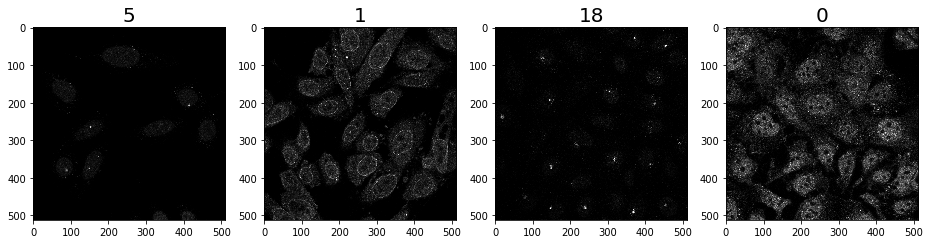

In [66]:
#aveugle
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(df.Image[2:6], df.Target[2:6])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (512,512)), cmap=plt.cm.gray)
 plt.title(label, fontsize = 20)
# plt.title('classe :' label, fontsize = 20)

In [74]:
#modif
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.Image[2:6], df.Image[2:6], test_size=0.25, random_state=0)

AttributeError: 'DataFrame' object has no attribute 'Image'

In [32]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [26]:
from sklearn.linear_model import LogisticRegression

In [33]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [30]:
x_train

Id
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0    [[36, 22, 14, 49, 36, 60, 56, 28, 28, 33, 17, ...
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: Image, dtype: object

In [31]:
y_train

Id
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0    [[36, 22, 14, 49, 36, 60, 56, 28, 28, 33, 17, ...
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: Image, dtype: object

In [29]:
logisticRegr.fit(x_train, y_train)

ValueError: setting an array element with a sequence.

In [47]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

NotFittedError: This LogisticRegression instance is not fitted yet

In [48]:
logisticRegr.predict(x_test[0:10])

NotFittedError: This LogisticRegression instance is not fitted yet

In [49]:
predictions = logisticRegr.predict(x_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [50]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

NotFittedError: This LogisticRegression instance is not fitted yet

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [52]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

NameError: name 'predictions' is not defined

In [53]:
#Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

NameError: name 'cm' is not defined

<Figure size 648x648 with 0 Axes>

In [54]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

NameError: name 'cm' is not defined

<Figure size 648x648 with 0 Axes>